# Load dataset

In [1]:
import pandas as pd

https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19

In [2]:
pd.read_csv('https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/testy.csv')

,datum,prirustkovy_pocet_testu,kumulativni_pocet_testu,prirustkovy_pocet_prvnich_testu,kumulativni_pocet_prvnich_testu
0,2020-01-27,20,20,NaN,NaN
1,2020-01-28,8,28,NaN,NaN
2,2020-01-29,5,33,NaN,NaN
3,2020-01-30,1,34,NaN,NaN
4,2020-01-31,3,37,NaN,NaN
...,...,...,...,...,...
557,2021-08-06,53327,9244460,53318.0,8772334.0
558,2021-08-07,38648,9283108,38648.0,8810982.0
559,2021-08-08,19529,9302637,19529.0,8830511.0
560,2021-08-09,33911,9336548,33877.0,8864388.0


In [3]:
tests = pd.read_csv('https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/testy.csv',
                    usecols=[0,1],
                    names=['date', 'tests'], header=1,
                    parse_dates=['date'], 
                    )
tests

,date,tests
0,2020-01-28,8
1,2020-01-29,5
2,2020-01-30,1
3,2020-01-31,3
4,2020-02-01,1
...,...,...
556,2021-08-06,53327
557,2021-08-07,38648
558,2021-08-08,19529
559,2021-08-09,33911


In [4]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
 1   tests   561 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.9 KB


# `matplotlib`

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.rcParams["figure.figsize"] = [9, 6]

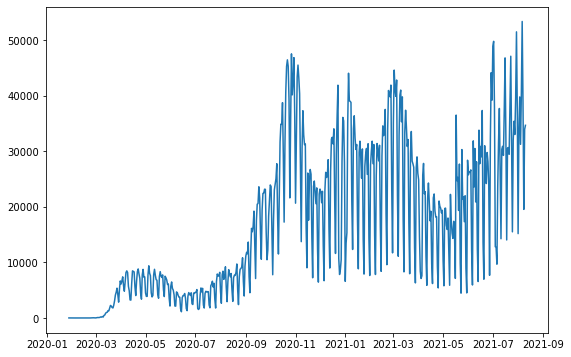

In [7]:
plt.plot(tests['date'] ,tests['tests'])

Text(0.5, 1.0, 'Tests in October')

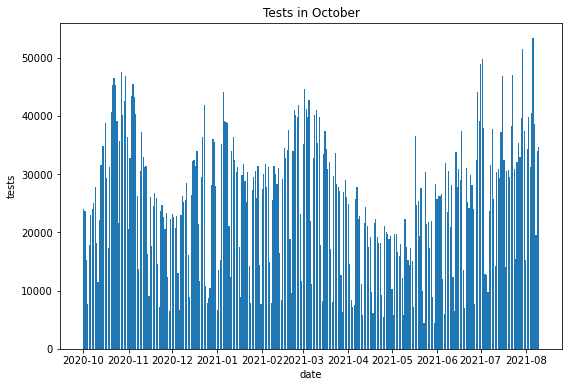

In [8]:
plt.bar('date' ,'tests',  data=tests.query('date >= "2020-10-01"'))

plt.xlabel('date')
plt.ylabel('tests')
plt.title('Tests in October')

- examples
- gallery https://matplotlib.org/3.1.1/gallery/index.html
- backends

# `plotnine`

In [9]:
from plotnine import *

In [10]:
import plotnine as p9
p9.options.figure_size = (12,4)

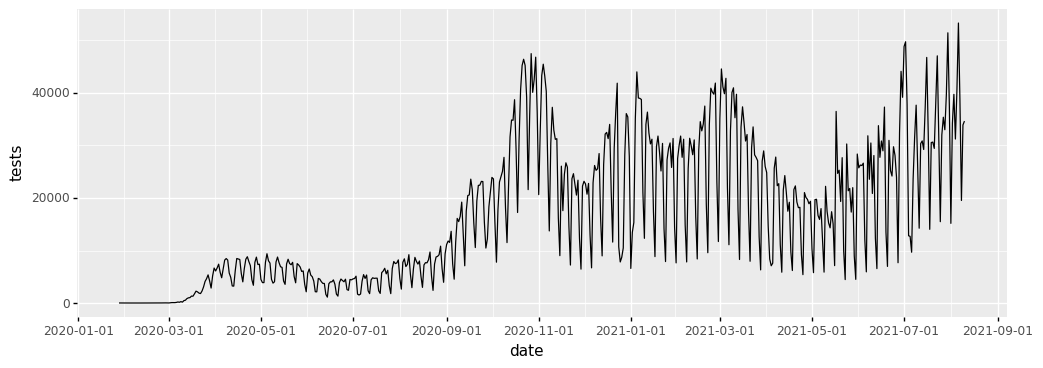

<ggplot: (8730008555764)>

In [11]:
(ggplot(tests)
 + aes('date', 'tests')
 + geom_line()
)

In [12]:
cases = pd.read_csv(
    'https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/nakaza.csv',
    usecols=[0, 1],
    names=['date', 'cases'], header=1,
    parse_dates=['date'], 
)
cases

,date,cases
0,2020-03-02,0
1,2020-03-03,0
2,2020-03-04,0
3,2020-03-05,0
4,2020-03-06,0
...,...,...
523,2021-08-07,0
524,2021-08-08,0
525,2021-08-09,0
526,2021-08-10,0


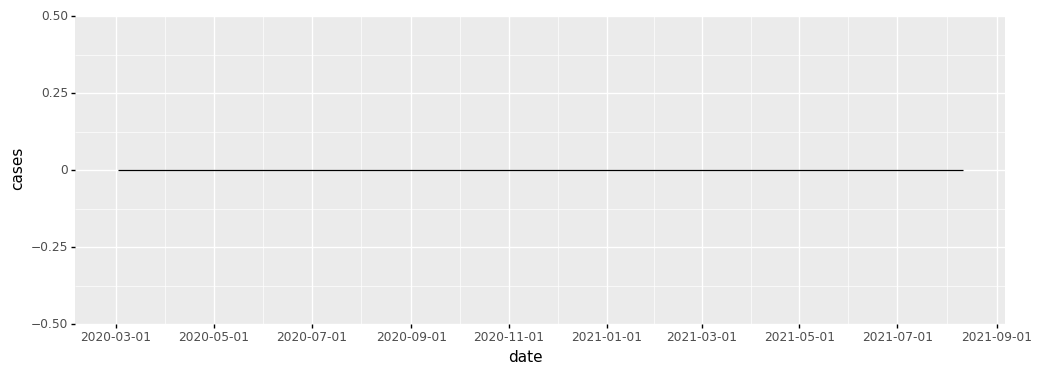

<ggplot: (8730008553313)>

In [13]:
(ggplot(cases)
 + aes('date', 'cases')
 + geom_line()
)

In [14]:
df = tests.merge(cases)
df

,date,tests,cases
0,2020-03-02,51,0
1,2020-03-03,78,0
2,2020-03-04,67,0
3,2020-03-05,76,0
4,2020-03-06,111,0
...,...,...,...
522,2021-08-06,53327,0
523,2021-08-07,38648,0
524,2021-08-08,19529,0
525,2021-08-09,33911,0


In [15]:
df.eval('cases / tests * 100')

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
522    0.0
523    0.0
524    0.0
525    0.0
526    0.0
Length: 527, dtype: float64

In [16]:
df['p_positive'] = df.eval('cases / tests * 100')

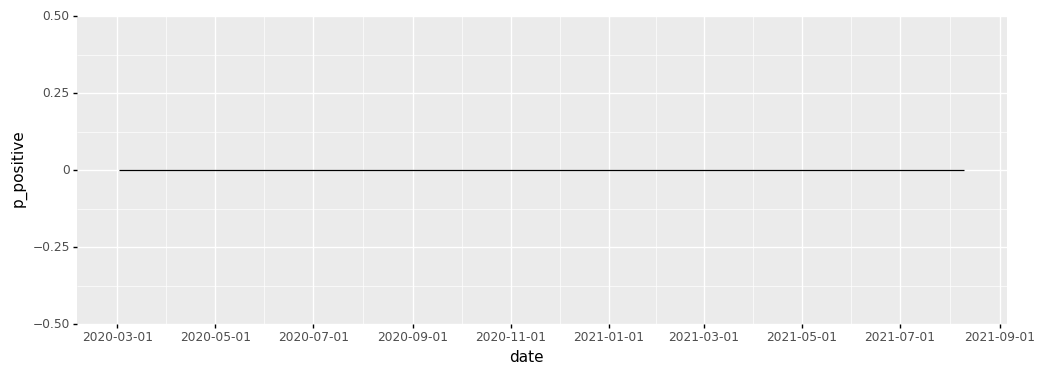

<ggplot: (8730013728714)>

In [17]:
(ggplot(df)
 + aes('date', 'p_positive')
 + geom_line()
)

In [18]:
cum = pd.read_csv(
    'https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/nakazeni-vyleceni-umrti-testy.csv',
#     usecols=[0, 1],
    names=['date', 'c_cases', 'c_healed', 'c_dead', 'c_tests'], header=1,
    parse_dates=['date'], 
)
cum

,,,,,,date,c_cases,c_healed,c_dead,c_tests
2020-01-28,0,0,0,28,0,0,0,0,8,0
2020-01-29,0,0,0,33,0,0,0,0,5,0
2020-01-30,0,0,0,34,0,0,0,0,1,0
2020-01-31,0,0,0,37,0,0,0,0,3,0
2020-02-01,0,0,0,38,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2022-02-02,3144263,2736988,37359,18607981,31538179,43322,17221,38,135384,18398
2022-02-03,3181944,2790759,37394,18741070,31571806,37681,53771,35,133089,33627
2022-02-04,3210642,2835677,37436,18861771,31595826,28698,44918,42,120701,24020
2022-02-05,3234638,2875661,37468,18934217,31600787,23996,39984,32,72446,4961


In [19]:
(ggplot(cum)
 + aes('date', 'c_dead')
 + geom_line()
)

TypeError: '<' not supported between instances of 'str' and 'int'

In [20]:
cum.set_index('date').diff()

,c_cases,c_healed,c_dead,c_tests
date,,,,
0,NaN,NaN,NaN,NaN
0,0.0,0.0,-3.0,0.0
0,0.0,0.0,-4.0,0.0
0,0.0,0.0,2.0,0.0
0,0.0,0.0,-2.0,0.0
...,...,...,...,...
43322,2929.0,-5.0,-19416.0,-9303.0
37681,36550.0,-3.0,-2295.0,15229.0
28698,-8853.0,7.0,-12388.0,-9607.0


In [21]:
cum['dead'] = cum['c_dead'].diff()

In [22]:
(ggplot(cum)
 + aes('date', 'dead')
 + geom_line()
)

TypeError: '<' not supported between instances of 'str' and 'int'

In [23]:
df.merge(cum)

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [28]:
hyg1 = pd.read_csv(
    'https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/osoby.csv', 
)
hyg1

,id,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,nakaza_v_zahranici,nakaza_zeme_csu_kod,reportovano_khs
0,380b8c6c-6393-42da-890d-dfa337c39ee8,2020-03-01,21.0,Z,CZ010,CZ0100,1.0,IT,1.0
1,8396fd12-a647-4555-af5c-c3d889e206a3,2020-03-01,67.0,M,CZ010,CZ0100,1.0,IT,1.0
2,b464ea0d-1c66-4fd6-92a8-fffab7578496,2020-03-01,43.0,M,CZ042,CZ0421,1.0,IT,1.0
3,8d179efc-68ec-4b2e-b92f-a3f3c91cbcd8,2020-03-03,53.0,Z,CZ042,CZ0421,1.0,IT,1.0
4,a16ed4d0-c072-4a81-869e-d315f21f4588,2020-03-03,21.0,Z,CZ010,CZ0100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3243693,a78b57a4-6b7b-41b6-b28d-818e85f86bf9,2022-02-06,43.0,M,CZ052,CZ0525,NaN,NaN,1.0
3243694,c291f789-b626-497e-b67c-9538eed246bb,2022-02-06,35.0,M,CZ010,CZ0100,NaN,NaN,1.0
3243695,2f9c1c73-9aef-458c-a489-77414ffbb56d,2022-02-06,15.0,M,CZ064,CZ0643,NaN,NaN,1.0
3243696,6a11678d-46e0-4ff4-8aa0-c7e5634a403b,2022-02-06,15.0,Z,CZ080,CZ0805,NaN,NaN,1.0


In [25]:
hyg1['country'].unique()

array([ 1., nan])

In [29]:
regions = pd.read_excel(
    'https://www.czso.cz/documents/10180/131222971/cz_nuts_systematicka_cast.xlsx',
    sheet_name='CZ-NUTS_od 1.1.2021',
    header=2,
    usecols=[0, 4],
    names=['kraj_nuts_kod', 'region']   
).dropna()

regions

,kraj_nuts_kod,region
3,CZ010,Hlavní město Praha
5,CZ020,Středočeský kraj
7,CZ031,Jihočeský kraj
8,CZ032,Plzeňský kraj
10,CZ041,Karlovarský kraj
11,CZ042,Ústecký kraj
13,CZ051,Liberecký kraj
14,CZ052,Královéhradecký kraj
15,CZ053,Pardubický kraj
17,CZ063,Kraj Vysočina


In [30]:
hyg1 = hyg1.merge(regions)
hyg1['count'] = 1
hyg1

,id,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,nakaza_v_zahranici,nakaza_zeme_csu_kod,reportovano_khs,region,count
0,380b8c6c-6393-42da-890d-dfa337c39ee8,2020-03-01,21.0,Z,CZ010,CZ0100,1.0,IT,1.0,Hlavní město Praha,1
1,8396fd12-a647-4555-af5c-c3d889e206a3,2020-03-01,67.0,M,CZ010,CZ0100,1.0,IT,1.0,Hlavní město Praha,1
2,a16ed4d0-c072-4a81-869e-d315f21f4588,2020-03-03,21.0,Z,CZ010,CZ0100,NaN,NaN,NaN,Hlavní město Praha,1
3,1935ceae-1267-477c-9290-df3557f2cf98,2020-03-04,21.0,Z,CZ010,CZ0100,NaN,NaN,NaN,Hlavní město Praha,1
4,1ee3d121-9314-4ce5-a3b6-0b10ff6ba0ae,2020-03-06,1.0,Z,CZ010,CZ0100,1.0,IT,1.0,Hlavní město Praha,1
...,...,...,...,...,...,...,...,...,...,...,...
3240769,84b35ec5-3eae-4975-8748-d8b49cd3c906,2022-02-06,36.0,M,CZ031,CZ0317,NaN,NaN,1.0,Jihočeský kraj,1
3240770,306b8bf1-f3e3-49d2-bffc-2bcf2487969f,2022-02-06,56.0,Z,CZ031,CZ0317,NaN,NaN,1.0,Jihočeský kraj,1
3240771,1e6c9e51-0ce7-4de5-861a-46014fc70598,2022-02-06,22.0,M,CZ031,CZ0315,NaN,NaN,1.0,Jihočeský kraj,1
3240772,cf8e19f5-f63c-4c95-b897-981c1cb231bb,2022-02-06,31.0,M,CZ031,CZ0312,NaN,NaN,1.0,Jihočeský kraj,1


/opt/conda/envs/py3.9/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 328 rows containing missing values.


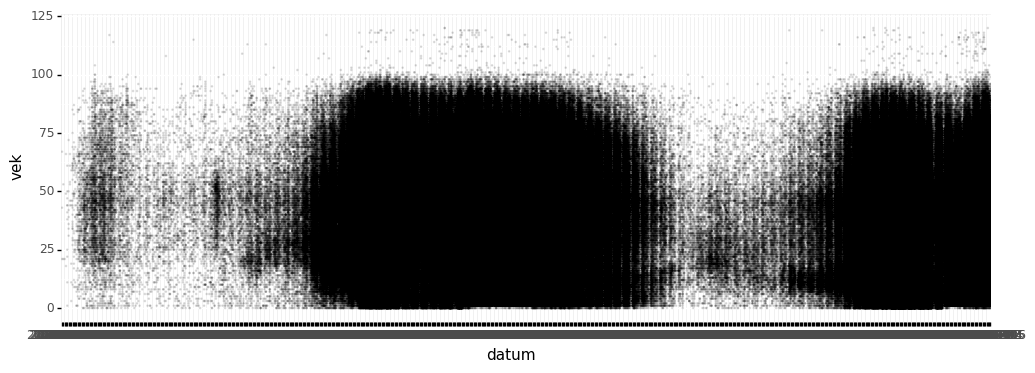

<ggplot: (8729948092124)>

In [32]:
(ggplot(hyg1)
 + aes('datum', 'vek')
 + geom_point(size=.1, alpha=.1)
)

In [35]:
hyg1g = hyg1.groupby(['datum', 'vek'])[['count']].count().reset_index()
hyg1g

,datum,vek,count
0,2020-03-01,21.0,1
1,2020-03-01,43.0,1
2,2020-03-01,67.0,1
3,2020-03-03,21.0,1
4,2020-03-03,53.0,1
...,...,...,...
56729,2022-02-06,93.0,6
56730,2022-02-06,94.0,4
56731,2022-02-06,95.0,2
56732,2022-02-06,96.0,3


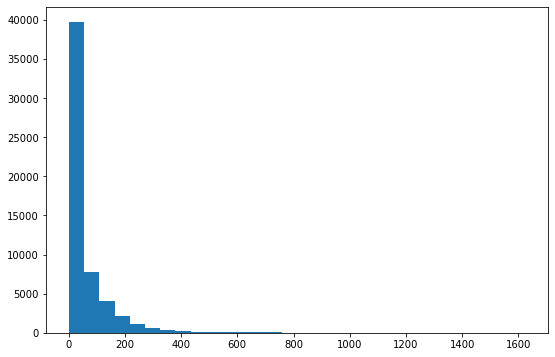

In [36]:
_ = plt.hist(hyg1g['count'], bins=30)

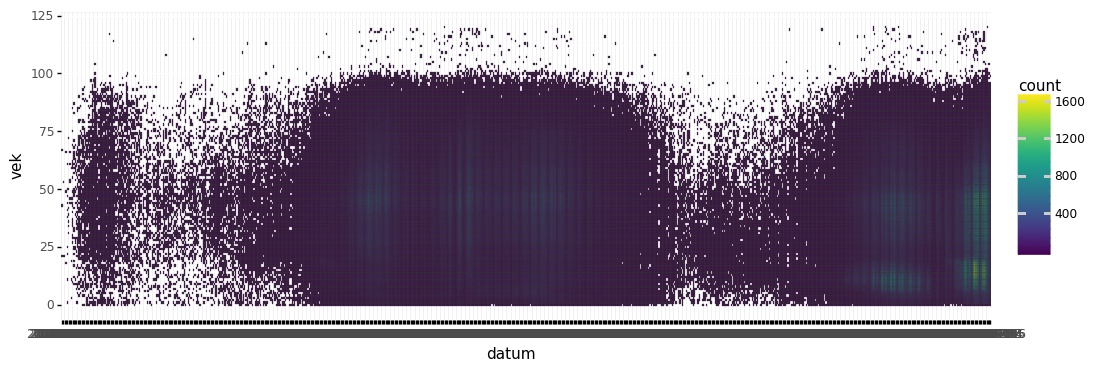

<ggplot: (8730007940548)>

In [37]:
(ggplot(hyg1g)
 + aes('datum', 'vek', color='count')
 + geom_tile()
)

In [ ]:
# tests['date'] > pd.to_datetime('2020-10-01')
# pd.to_datetime('2020-10-01')
# tests.query('date >= "2020-10-01"')